# Practica 1
## Eduardo Ceja
## Optimizacion no Lineal

In [1]:
import copy
import random
import numpy as np
from math import atan, pi
import matplotlib.pyplot as plt

 ## Parte 1
 Minimizar la funcion:
 $$ f(x) = 0.65 - \frac{0.75}{1 + x^2} - 0.65x \tan^{-1}(\frac{1}{x}) $$


En el intervalo $[0,3]$ con una precision $0.001$ utilizando los metodos de:
 * Busqueda Exhaustiva
 * Division de intervalos por la mitad
 * Fibonacci
 * Seccion dorada

In [2]:
counts = 0

In [3]:
def f(x):
    global counts
    counts += 1
    return 0.65 - (0.75/(1+ x**2)) - 0.65*x*atan(1/x) if x!= 0 else 0.65 - (0.75/(1+ x**2))

In [4]:
a = 0
b = 3

### Busqueda exhaustiva

In [5]:
def busqueda_exhaustiva(x1,x2,x3,b,delta_x):
    while x3 <= b:
        if x1 == 0 or x2 == 0 or x3 == 0:
            x1 = x2
            x2 = x3
            x3 = x2 + delta_x
            continue

        try:
            f1 = f2
            f2 = f3            
        except:
            f1 = f(x1)
            f2 = f(x2)
    
        f3 = f(x3)
        if f1 >= f2 and f2 <= f3:
            return x1,x3

        x1 = x2
        x2 = x3
        x3 = x2 + delta_x
    return None,None

In [6]:
delta_x = 0.0005
x1 = a
x2 = x1 + delta_x
x3 = x2 + delta_x

In [7]:
a_exa, b_exa = busqueda_exhaustiva(x1,x2,x3,b,delta_x)
print(f"Intervalo de la funcion: ({a_exa:.3f},{b_exa:.3f})\nNumero de evaluaciones {counts}")


Intervalo de la funcion: (0.481,0.482)
Numero de evaluaciones 963


### Division de intervalos por la mitad

In [8]:
counts = 0; counts

0

In [9]:
def division_mitad(a : float ,b: float ,epsilon: float) -> tuple:
    L = b-a

    xm = (a+b)/2
    x1 = a + (L/4)
    x2 = b - (L/4)

    fm = f(xm)
    
    while abs(L) > epsilon:
        f1 = f(x1)
        if  f1 < fm:
            b = xm
            xm = x1
            fm = f1
        else:

            f2 =f(x2)
            if f2 < fm:
                a = xm
                xm = x2
                fm = f2
            else:
                a = x1
                b = x2
        
        L = b-a
        
        x1 = a + (L/4)
        x2 = b - (L/4)
    return a,b

In [10]:
a_mitad, b_mitad = division_mitad(a,b,0.001)
print(f"Intervalo de la funcion: ({a_mitad:.3f},{b_mitad:.3f})\nNumero de evaluaciones {counts}")

Intervalo de la funcion: (0.480,0.481)
Numero de evaluaciones 20


### Fibonacci

In [11]:
counts = 0; counts

0

In [12]:
def fibonacci(N) -> list:
    fibonacci_secuence = [1, 1]
    if N == 0 or N == 1:
        return fibonacci_secuence
    for i in range(2, N + 1):
        next_fib = fibonacci_secuence[i - 1] + fibonacci_secuence[i - 2]
        fibonacci_secuence.append(next_fib)

    return fibonacci_secuence

In [13]:
def fibonacci_search(a,b,N) -> tuple:
    k = 2
    fib_secuence = fibonacci(N)
    L = (b-a)
    
    Lk_estrella = (fib_secuence[N-k]/fib_secuence[-1]) * L
    x1 = a + Lk_estrella
    x2 = b - Lk_estrella
    f1 = f(x1)
    f2 = f(x2)
    changed_a = False
    while True:
        if f1 > f2:
            a = x1
            f1 = f2
            changed_a = True
        else:
            b = x2
            #cambio x2 = x1
            f2 = f1
        k += 1
        if k > N:
            break
        
        Lk_estrella = (fib_secuence[N-k]/fib_secuence[-1]) * L
        x1 = a + Lk_estrella
        x2 = b - Lk_estrella
        if changed_a:
            f2 = f(x2)
            changed_a = False
        else:
            f1 =f(x1)

    return a,b

In [14]:
a_fib, b_fib = fibonacci_search(a,b,18)
print(f"Intervalo de la funcion: ({a_fib:.3f},{b_fib:.3f})\nNumero de evaluaciones {counts}")

Intervalo de la funcion: (0.480,0.481)
Numero de evaluaciones 18


In [15]:
fib = fibonacci(50)
for i,j in enumerate(fib):
    if j >= 3000:
        print(i,j)
        break

18 4181


### Seccion Dorada

In [16]:
counts = 0; counts

0

In [17]:
def w_to_x(w,a,b):
    return (w*(b-a)) + a

In [18]:
def seccion_dorada(a,b, epsilon):
    tao = 0.618
    aw = 0
    bw = 1
    Lw = 1

    w1 = aw + tao*Lw #mi punto 1 +  tao
    w2 = bw - tao*Lw #punto 1- tao
    f1 = f(w_to_x(w1,a,b))
    f2 = f(w_to_x(w2,a,b))
    updated_a = False
    while True:

        if f1 < f2:
            aw = w2
            updated_a = True
        else:
            bw = w1

        Lw = bw - aw

        if Lw <= (epsilon/(b-a)):
            break
        
        if updated_a:
            w2 = w1
            f2 =f1
            w1 = aw + tao*Lw 
            f1 = f(w_to_x(w1,a,b))
            updated_a = False
        else:
            f1 = f2
            w1 = w2
            w2 = bw - tao*Lw 
            f2 = f(w_to_x(w2,a,b))

    return w_to_x(aw,a,b),w_to_x(bw,a,b)

In [19]:
a_golden, b_golden = seccion_dorada(a,b,0.001)
print(f"Intervalo de la funcion: ({a_golden:.3f},{b_golden:.3f})\nNumero de evaluaciones {counts}")

Intervalo de la funcion: (0.481,0.481)
Numero de evaluaciones 18


In [20]:
a_golden,b_golden

(0.48064628293683687, 0.48148559860640194)

## Parte 2
### Iteraciones Teoricas

* **Busqueda exhaustiva**:

Para este metodo, sabemos que la precision esta definida como:
$$ \varepsilon = \frac{2(b-a)}{n}$$

Donde $\varepsilon$ es la precision a la que se quiere llegar, $a$ y $b$ son el principio y el final del intervalo y $n$ el numero de iteraciones. Como tenemos el requerimiento de que $\varepsilon = 0.001$, tenemos que despejar $n$:

$$n = \frac{2(b-a)}{\varepsilon}$$
Sustituyendo:
$$
 n = \frac{2(3-0)}{0.001} \\
 n = \frac{6}{0.001} \\
 n = 6,000
$$

* **Division por la mitad**:

Este metodo, tiene su precision definia como:
$$ \varepsilon = (\frac{1}{2})^{\frac{n}{2}}L_0 $$

Para despejar $n$:

$$n = 2log_{1/2}(\varepsilon / L_0)$$

Ahora sustituyendo:

$$
 n = 2log_{1/2}(0.001 / (3-0)) \\
 n = 2log_{1/2}(0.001/3) \\
 n \approx 23.10149
$$

* **Fibonacci**:

La presicion para este metodo esta definida por

$$ \varepsilon = \frac{1}{F_n}L$$

Despejando $F_n$

$$
F_n = \frac{L}{\varepsilon}
$$

Sustituyendo:

$$
F_n = \frac{3-0}{0.001} \\
F_n = \frac{3}{0.001} \\
F_n \approx 3000 
$$
Siguendo la sucesion de Fibonacci, vemos que el numero $n$ correspondiente que es mayor es $18$ 

* **Seccion dorada**:

La precision se define como:

$$ \varepsilon = \tau^{(n-1)} * (b-a)$$

Donde $\tau = 0.618$
Para despejar $n$, nos queda como:
$$
\varepsilon = \tau^{(n-1)} * (b-a) \\
\frac{\varepsilon}{(b-a)} = \tau^{(n-1)} \\
\tau^{(n-1)} = \frac{\varepsilon}{(b-a)} \\
log_\tau(\tau^{(n-1)}) = log_\tau(\varepsilon/(b-a)) \\
n-1  = log_\tau(\varepsilon/(b-a)) \\
n = log_\tau(\varepsilon/(b-a)) + 1
$$

Sustituyendo:
$$
n = log_\tau(\varepsilon/(b-a)) + 1 \\
n = log_\tau(0.001/(3-0)) + 1\\
n = log_\tau(0.001/3) + 1 \\
n \approx 16.636026 + 1 \\
n \approx 17.636026
$$


## Parte 3

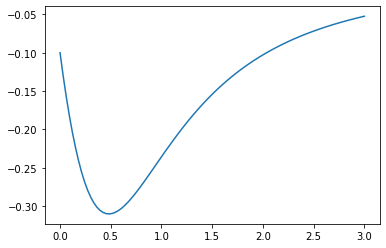

In [21]:
x = np.linspace(0,3,100)
plt.plot(x, [f(_) for _ in x])

## Parte 4

Para evaluar cual es mejor, se va a hacer la tabla comparativa con los valores de $n = 10,20,30,40,50$. Para hacer estas evaluaciones, se va a utilizar el siguente metodo de evaluacion:

$$ 
RF(N) = \frac{L_N}{L_0}
$$

Donde $L_N$ es la longitud despues de $N$ iteraciones y $L_0$ es la longitud inicial del intervalo.


Rercodemos para cada metodo, como estan definido $L_N$.

* **Busqueda exhaustiva**

$$
L_N = \frac{2L_0}{N}
$$

* **Division de intervalo por la mitad**
$$
L_N = (\frac{1}{2})^{N/2}L_0
$$

* **Fibonacci**
$$
L_N = \frac{1}{F_N}L_0
$$

* **Seccion dorada**
$$
L_N = (\tau)^{N - 1} L_0
$$

Metodo               |N = 10     | N = 20      | N = 30     | N = 40     | N = 50  
:--------------------|:---------:|:-----------:|:----------:|:----------:|:--------:
Busqueda Exhaustiva  |0.2        |0.01         |0.06667     |0.05        |0.04     
Div intervalos Mitad |0.031      |0.00097      |3.05e-5     |9.53e-7     |2.98e-8  
Fibonacci            |0.0112     |9.13e-5      |7.42e-7     |6.039e-9    |4.91e-11 
Seccion Dorada       |0.01314    |0.0001       |8.68e-7     |7.055e-9    |5.733e-11


Los metodos que tienen menor numero de llamadas a la funcion objetivo, en la teoria tanto como en la practica. Comparando con la tabla observada arriba, podemos corroborar que estos dos metodos son los mejores pero se ve que Fibonacci es el que tiene mejor precision.

In [22]:
ln = 2*(3-0)/50; ln/(3-0)

0.04

In [23]:
ln2 = (1/2)**(50/2) * (3-0); ln2/(3-0)

2.9802322387695312e-08

In [24]:
lista_iters = fibonacci(50)

In [25]:
ln3 = (3-0)/lista_iters[50] ;ln3/(3-0)

4.910382795110283e-11

In [26]:
ln4 = (0.618**(50-1))*(3-0); ln4/(3-0)

5.7337041376796644e-11